## Setup

In [2]:
! pip3 install investpy
! pip3 install stockstats
! pip3 install ta
! pip3 install eod

import datetime as dt
from datetime import date
import investpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statistics
import stockstats
from stockstats import StockDataFrame
import ta
import time


In [3]:
stock_country = 'united states'
stock_list = investpy.stocks.get_stocks_list(country=stock_country)
print(stock_list)

['BA', 'GM', 'CVX', 'C', 'BAC', 'T', 'CAT', 'INTC', 'MSFT', 'AA', 'F', 'EBAY', 'DELL', 'DIS', 'DOW', 'CSCO', 'DE', 'FDX', 'GIS', 'GLW', 'GT', 'GS', 'JPM', 'KMB', 'KHC', 'KO', 'MCD', 'LLY', 'ORCL', 'MRK', 'MSI', 'MMM', 'ODP', 'CAKFF', 'PMMAF', 'VRTX', 'MNST', 'TEVA', 'FITB', 'SHLDQ', 'CTAS', 'ADSK', 'DISH', 'GILD', 'LIFE', 'GOOGL', 'FISV', 'LBTYA', 'PDLI', 'ADBE', 'BB', 'QCOM', 'SINA', 'BIDU', 'SOHU', 'DISCA', 'RBBN', 'AMAT', 'STLD', 'CDNS', 'BBBY', 'MCHP', 'WYNN', 'ISRG', 'NDAQ', 'RYAAY', 'APLO', 'INFY', 'JBLU', 'SPAR', 'HSIC', 'PAYX', 'VRSN', 'AAPL', 'FAST', 'XRAY', 'CROX', 'ZION', 'NTRS', 'CTXS', 'LAMR', 'PTEN', 'ATLC', 'CHRW', 'SIRI', 'ALPN', 'PCAR', 'PAAS', 'AMZN', 'ROST', 'VIAV', 'NTES', 'NTAP', 'ETFC', 'GRMN', 'COST', 'CHKP', 'LRCX', 'CIEN', 'IAC', 'INTU', 'EXPE', 'TCOM', 'UTSI', 'CTSH', 'RMBS', 'NIHD', 'YRCW', 'AKAM', 'KLAC', 'JNPR', 'ATVI', 'FLEX', 'AMGN', 'XLNX', 'EXPD', 'EA', 'PDCO', 'TROW', 'BIIB', 'QRTEA', 'SCHW', 'HBAN', 'NLOK', 'NVDA', 'SRCL', 'SBUX', 'CELG', 'CINF', 'EXT

In [4]:
stock = investpy.get_stock_historical_data(stock='FB', country='United States', from_date='31/12/2015', to_date=date.today().strftime("%d/%m/%Y"))
stock = StockDataFrame(stock)
stock.columns = stock.columns.str.lower()

stock[['close_10_sma', 'close_20_sma', 'close_50_sma', 'rsi_14', 'macd', 'macds']]
# stock = stock.dropna().iloc[1: , :]
stock

,open,high,low,close,volume,currency,close_10_sma,close_20_sma,close_50_sma,close_-1_s,close_-1_d,rs_14,rsi_14,macd,macds,macdh
Date,,,,,,,,,,,,,,,,
2015-12-31,106.00,106.17,104.62,104.66,18391064,USD,104.660000,104.660000,104.660000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2016-01-04,101.95,102.24,99.75,102.22,37912404,USD,103.440000,103.440000,103.440000,104.66,-2.44,0.000000,0.000000,-0.054744,-0.030413,-0.024330
2016-01-05,102.89,103.71,101.67,102.73,23258238,USD,103.203333,103.203333,103.203333,102.22,0.51,0.225095,18.373649,-0.053939,-0.040055,-0.013884
2016-01-06,101.13,103.77,100.90,102.97,25096184,USD,103.145000,103.145000,103.145000,102.73,0.24,0.339170,25.326862,-0.043586,-0.041251,-0.002335
2016-01-07,100.50,101.43,97.30,97.92,45172904,USD,102.100000,102.100000,102.100000,102.97,-5.05,0.094609,8.643158,-0.237994,-0.099778,-0.138216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,336.89,340.67,335.30,338.03,16282960,USD,340.575000,337.133500,335.463600,333.12,4.91,1.030939,50.761699,1.020761,0.872790,0.147971
2021-11-30,335.00,335.81,323.43,324.46,25248472,USD,338.265000,336.857500,334.838800,338.03,-13.57,0.723580,41.981211,-0.137664,0.670699,-0.808363
2021-12-01,330.29,330.50,310.29,310.60,30384084,USD,335.029000,335.983500,333.901200,324.46,-13.86,0.544893,35.270582,-2.149334,0.106692,-2.256027


In [3]:
# Apple stock will be saved at search_result
stock_info = investpy.search_quotes(text='NVDA', countries=['united states'], n_results=1)
# Save the information in a dict variable
stock_info = stock_info.retrieve_information()
print(stock_info)

{'prevClose': 326.74, 'dailyRange': '313.5-327.1', 'revenue': 24270000000, 'open': 326, 'weekRange': '115.67-346.47', 'eps': 3.24, 'volume': 27538284, 'marketCap': 787570000000, 'dividend': '0.16(0.05%)', 'avgVolume': 31801547, 'ratio': 97.25, 'beta': 1.39, 'oneYearReturn': '137.56%', 'sharesOutstanding': 2500000000, 'nextEarningDate': '17/02/2022'}


In [ ]:
# FIXME: https://towardsdatascience.com/a-simple-way-to-get-a-stocks-fundamental-data-26506adf1214

# Libraries
from eod import EodHistoricalData
from functools import reduce
from datetime import datetime, timedelta# Importing and assigning the api key
with open("../eodHistoricalData-API.txt", "r") as f:
    api_key = f.read()
    
# EOD Historical Data client
client = EodHistoricalData(api_key)

def getFundamentals(ticker):
    """
    Returns the fundamental data from the financial data API.  Combines the quarterly balance 
    sheet, cash flow, income statement, and earnings for a specific stock ticker.
    """
    
    # Getting data
    fund_data = client.get_fundamental_equity(ticker)
    
    # Financials
    bal = pd.DataFrame(fund_data['Financials']['Balance_Sheet']['quarterly']).T
    
    cf = pd.DataFrame(fund_data['Financials']['Cash_Flow']['quarterly']).T
    
    inc = pd.DataFrame(fund_data['Financials']['Income_Statement']['quarterly']).T
    
    # Earnings
    earn = pd.DataFrame(fund_data['Earnings']['History']).T
    
    # Merging them together
    df = reduce(
        lambda left,right: pd.merge(
            left,
            right,
            left_index=True, 
            right_index=True, 
            how='outer',
            suffixes=('', '_drop')
        ), 
        [bal, cf, inc, earn]
    )
    
    # Dropping redundant date and duplicate columns
    dup_cols = [i for i in df.columns if "date" in i or "Date" in i or "_drop" in i]
    
    df = df.drop(dup_cols, axis=1)
    
    return df

## Technical analysis
Futher information [here](https://medium.com/codex/this-python-library-will-help-you-get-stock-technical-indicators-in-one-line-of-code-c11ed2c8e45f) (stockstats) and [here](https://towardsdatascience.com/technical-analysis-library-to-financial-datasets-with-pandas-python-4b2b390d3543) (ta).

### SMA

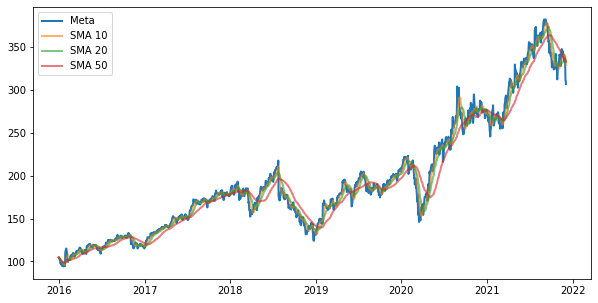

In [7]:
# Plot size in inches
plt.rcParams['figure.figsize'] = [10, 5]

# Plot the last 120 periods
plt.plot(stock['close'], linewidth = 2, label = 'Meta')
plt.plot(stock['close_10_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 10')
plt.plot(stock['close_20_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 20')
plt.plot(stock['close_50_sma'], linewidth = 2, alpha = 0.6, label = 'SMA 50')
plt.legend(loc = 'upper left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


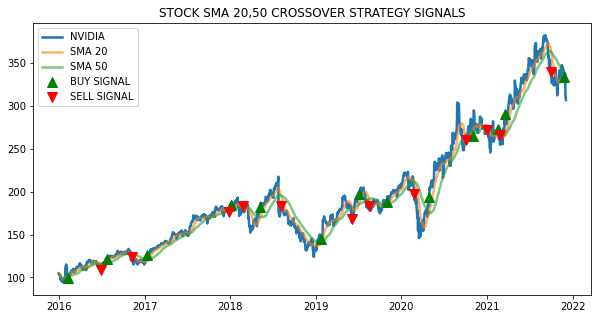

In [8]:
# stock['close_50_sma_xd_close_20_sma']

# Detect where the signals cross each other.
# Create buy and sell signals by close price, SMA_50 and SMA_20.
# This could be interesting for testing methods

buy_signals = stock['close_50_sma_xd_close_20_sma']
sell_signals = stock['close_20_sma_xd_close_50_sma']

# buy_signals = stock['close_20_sma_xu_close_50_sma']
# sell_signals = stock['close_50_sma_xu_close_20_sma']


for i in range(len(buy_signals)):
    if buy_signals.iloc[i] == True:
        buy_signals.iloc[i] = stock.close[i]
    else:
        buy_signals.iloc[i] = np.nan

for i in range(len(sell_signals)):    
    if sell_signals.iloc[i] == True:
        sell_signals.iloc[i] = stock.close[i]
    else:
        sell_signals.iloc[i] = np.nan


plt.rcParams['figure.figsize'] = [10, 5]

# Plot stock, indicators and signals
plt.plot(stock['close'], linewidth = 2.5, label = 'NVIDIA')
plt.plot(stock['close_20_sma'], linewidth = 2.5, alpha = 0.6, label = 'SMA 20')
plt.plot(stock['close_50_sma'], linewidth = 2.5, alpha = 0.6, label = 'SMA 50')
plt.plot(stock.index, buy_signals, marker = '^', markersize = 10, color = 'green', linewidth = 0, label = 'BUY SIGNAL')
plt.plot(stock.index, sell_signals, marker = 'v', markersize = 10, color = 'r', linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('STOCK SMA 20,50 CROSSOVER STRATEGY SIGNALS')
plt.style.use('bmh')
plt.show()

#### Statistical analysis

In [4]:
buy_signals.dropna()
# type(buy_signals.dropna())
buy_signals.index[0]==buy_signals.index[1]
# Integrar en un mismo dataset?
# bs_signals
type(buy_signals.dropna())
pd.concat([buy_signals.dropna(), sell_signals.dropna()])

Date
2020-04-20     71.76
2020-11-25    132.35
2020-11-30    134.01
2021-01-27    129.18
2021-04-15    161.37
2021-10-28    249.41
2020-03-19     53.24
2020-11-24    129.58
2020-11-27    132.61
2020-12-04    135.58
2021-03-15    131.91
2021-10-12    206.71
dtype: object

In [9]:
buy_signals = pd.Series(buy_signals.dropna(), name="Price").to_frame()
buy_signals['Type'] = 1
sell_signals = pd.Series(sell_signals.dropna(), name="Price").to_frame()
sell_signals['Type'] = 0

bs_signals = pd.concat([buy_signals, sell_signals]).sort_values(by='Date')
# Create a new list that have the differences between buy and sell signals. Then, mean and std could be really interesting!

bs_signals.reset_index(level=0, inplace=True)
bs_signals

,Date,Price,Type
0,2016-02-08,99.75,1
1,2016-06-27,108.97,0
2,2016-07-25,121.63,1
3,2016-11-08,124.22,0
4,2017-01-12,126.62,1
5,2017-12-26,175.99,0
6,2018-01-03,184.67,1
7,2018-02-23,183.29,0
8,2018-05-09,182.66,1
9,2018-08-07,183.81,0


In [10]:
## Cálculo de la rentabilidad por operación

# Si hay más señales de compra que de venta (a fecha de hoy)
if bs_signals.loc[bs_signals['Type']==1].shape[0]>bs_signals.loc[bs_signals['Type']==0].shape[0]:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
    diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
    # Cálculo en %
    # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price))*100
    
# Si hay más señales de venta que de compra (a fecha de hoy)
elif bs_signals.loc[bs_signals['Type']==1].shape[0]<bs_signals.loc[bs_signals['Type']==0].shape[0]:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    # Cálculo en %
    # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price))*100
    
# Si hay la misma cantidad de señales de compra que de venta
else:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    # Cálculo en %
    # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price))*100

diff_signals

array([0.09243107769423557, 0.021294088629450002, 0.38990680777128417,
       -0.007472789299832109, 0.006295850213511474, 0.1665280665280665,
       -0.06845841784989859, 0.045258964143426346, 0.3385859210052011,
       0.02476441764040706, -0.028182914793288664, 0.1698666023232566],
      dtype=object)

In [11]:
print(diff_signals.mean())
print(diff_signals.std())
print(stats.ttest_ind(diff_signals, np.zeros(diff_signals.shape), equal_var=False))

0.09590147283381828
0.1384809850956317
Ttest_indResult(statistic=2.296843873637854, pvalue=0.042265933581621846)


In [18]:
len(diff_signals)*diff_signals.mean()

1.1508176740058194

In [21]:
stock.close

2.9317790942098223

In [45]:
diff_stock = list()

for k in range(len(stock.close)-1):
    diff_stock.append(stock.close[k+1]/stock.close[k]-1)
    # print(k)

diff_stock = np.array(diff_stock)
diff_stock

array([-0.02331359,  0.00498924,  0.00233622, ..., -0.04271713,
       -0.00067611, -0.01143722])

In [46]:
diff_stock.mean()

0.0009304872654520417

In [47]:
len(diff_stock)*diff_stock.mean()

1.3892174873198981

#### Pointplot

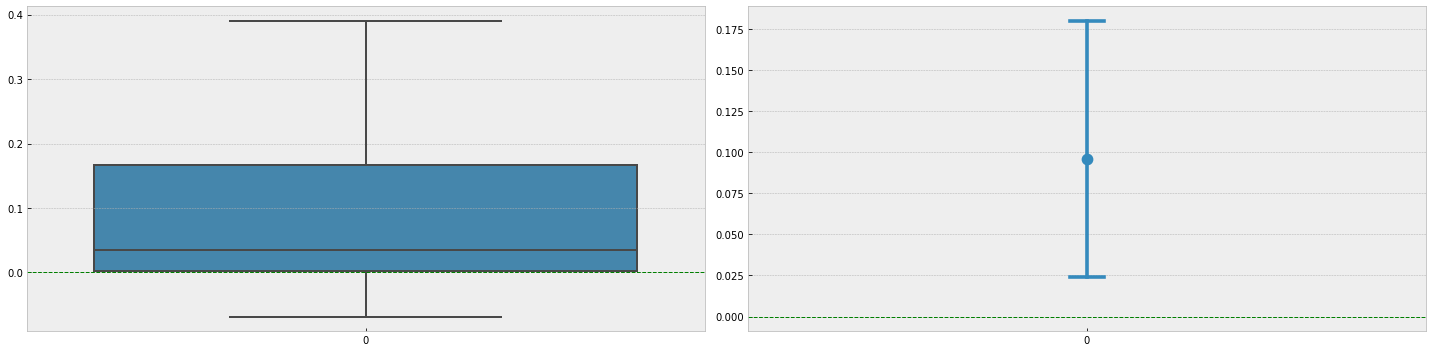

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data=diff_signals)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# plt.figure(figsize=(5,5))

plt.subplot(1,2,2)
sns.pointplot(data=diff_signals, capsize=0.05, ci=95, join=0)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(0.85,5400,'Mean:4504.3''\n''n:731' '\n' 't:1.601' '\n' 'Pval.:0.110', bbox=props)
# plt.figure(figsize=(5,5))
plt.tight_layout()

## MACD

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


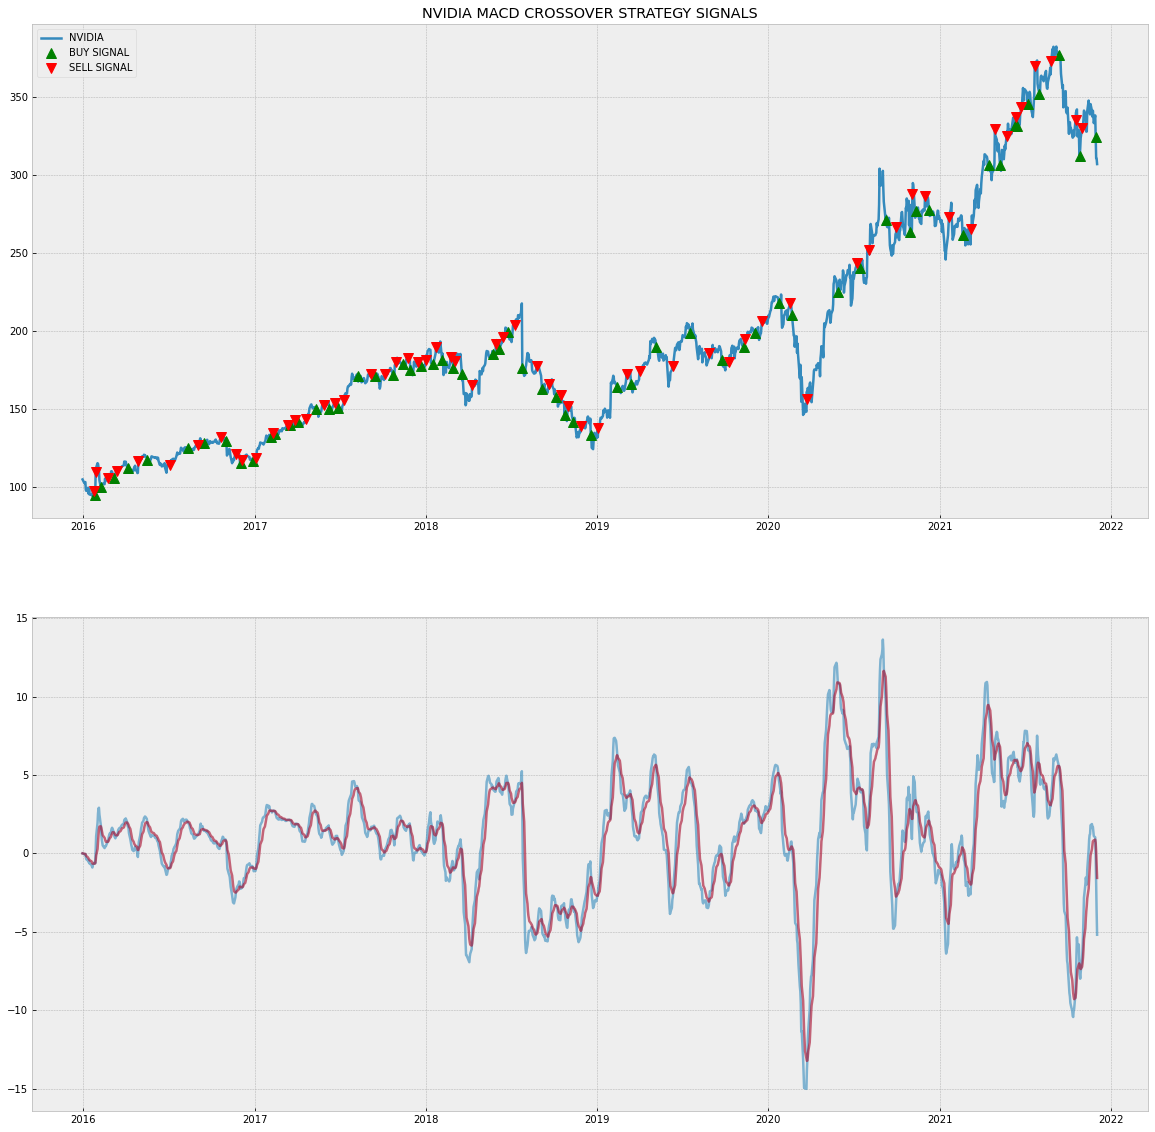

In [48]:
# MACD
# buy_signals = stock['macds_xd_macd']
# sell_signals = stock['macd_xd_macds']

# Inverted MACD
buy_signals = stock['macd_xd_macds']
sell_signals = stock['macds_xd_macd']


for i in range(len(buy_signals)):
    # FIXME: integración de estrategias distintas
    # if buy_signals.iloc[i] == True and stock.rsi_14[i] < (stock.dropna().iloc[1:,:].rsi_14.mean() - stock['rsi_14'].std()):
    if buy_signals.iloc[i] == True:
        buy_signals.iloc[i] = stock.close[i]
    else:
        buy_signals.iloc[i] = np.nan

for i in range(len(sell_signals)):
    # FIXME: integración de estrategias distintas
    # if sell_signals.iloc[i] == True and stock.rsi_14[i] > (stock.dropna().iloc[1:,:].rsi_14.mean() + stock['rsi_14'].std()):
    if sell_signals.iloc[i] == True:
        sell_signals.iloc[i] = stock.close[i]
    else:
        sell_signals.iloc[i] = np.nan

fig, ax = plt.subplots(2, 1, figsize=(20,20))
plt.subplot(2,1,1)
plt.rcParams['figure.figsize'] = [10, 5]

# Plot stock, indicators and signals
plt.plot(stock['close'], linewidth = 2.5, label = 'NVIDIA')
plt.plot(stock.index, buy_signals, marker = '^', markersize = 10, color = 'green', linewidth = 0, label = 'BUY SIGNAL')
plt.plot(stock.index, sell_signals, marker = 'v', markersize = 10, color = 'r', linewidth = 0, label = 'SELL SIGNAL')
plt.legend(loc = 'upper left')
plt.title('NVIDIA MACD CROSSOVER STRATEGY SIGNALS')
plt.style.use('bmh')


plt.subplot(2,1,2)
plt.plot(stock['macd'], linewidth = 2.5, alpha = 0.6, label = 'MACD')
plt.plot(stock['macds'], linewidth = 2.5, alpha = 0.6, label = 'MACD_SIGNAL')


plt.style.use('bmh')
plt.show()

#### Statistical analysis

In [49]:
buy_signals.dropna()
# type(buy_signals.dropna())
buy_signals.index[0]==buy_signals.index[1]
# Integrar en un mismo dataset?
# bs_signals
type(buy_signals.dropna())
pd.concat([buy_signals.dropna(), sell_signals.dropna()])

Date
2016-01-27     94.45
2016-02-09     99.54
2016-03-07    105.73
2016-04-05    112.22
2016-05-17    117.35
               ...  
2021-06-24    343.18
2021-07-23    369.79
2021-08-27    372.63
2021-10-18    335.34
2021-11-01    329.98
Length: 122, dtype: object

In [50]:
buy_signals = pd.Series(buy_signals.dropna(), name="Price").to_frame()
buy_signals['Type'] = 1
sell_signals = pd.Series(sell_signals.dropna(), name="Price").to_frame()
sell_signals['Type'] = 0

bs_signals = pd.concat([buy_signals, sell_signals]).sort_values(by='Date')
# Create a new list that have the differences between buy and sell signals. Then, mean and std could be really interesting!

bs_signals.reset_index(level=0, inplace=True)
bs_signals

,Date,Price,Type
0,2016-01-25,97.01,0
1,2016-01-27,94.45,1
2,2016-01-28,109.11,0
3,2016-02-09,99.54,1
4,2016-02-23,105.46,0
...,...,...,...
117,2021-09-13,376.51,1
118,2021-10-18,335.34,0
119,2021-10-27,312.22,1
120,2021-11-01,329.98,0


In [51]:
## Cálculo de la rentabilidad por operación

# Si hay más señales de compra que de venta (a fecha de hoy)
if bs_signals.loc[bs_signals['Type']==1].shape[0]>bs_signals.loc[bs_signals['Type']==0].shape[0]:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
    diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
    # Cálculo en %
    # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price))*100
    
# Si hay más señales de venta que de compra (a fecha de hoy)
elif bs_signals.loc[bs_signals['Type']==1].shape[0]<bs_signals.loc[bs_signals['Type']==0].shape[0]:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    # Cálculo en %
    # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price))*100
    
# Si hay la misma cantidad de señales de compra que de venta
else:
    diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
    # Cálculo en %
    # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price))*100

diff_signals

array([0.027104287983059843, 0.0961422543701024, -0.0025536744537975054,
       -0.02076278738192834, -0.005283340434597277, -0.08712363869314539,
       -0.009861469828598191, 0.019845559845559795, 0.04714038128249565,
       0.008250966910184857, -0.10124185976071486, 0.0006713912719132785,
       -0.0017162471395881656, 0.006491215691808481, -0.04238869634764053,
       0.01858288770053477, 0.018727586664895688, -0.09294310082953613,
       0.006609733270940544, 0.002502910360884624, 0.006153157688650189,
       0.04368183635013993, 0.015384615384615488, 0.01698525702113348,
       0.04463202030232817, 0.04177560531999542, 0.045433472415391765,
       -0.10750594851827816, 0.019130619619513203, -0.015829145728643246,
       0.15477136049018497, 0.09185996431428048, 0.05523422106400557,
       0.08723637359627506, 0.07205934298834325, 0.03958020989505248,
       -0.15858493443122904, 0.039342089408362466, -0.08093278463648836,
       -0.10531357128453324, 0.023665048543689275, -0.050

In [52]:
print(diff_signals.mean())
print(diff_signals.std())
print(stats.ttest_ind(diff_signals, np.zeros(diff_signals.shape), equal_var=False))

-0.0006982177947604529
0.07031673741536505
Ttest_indResult(statistic=-0.07691443006404346, pvalue=0.9389475270576502)


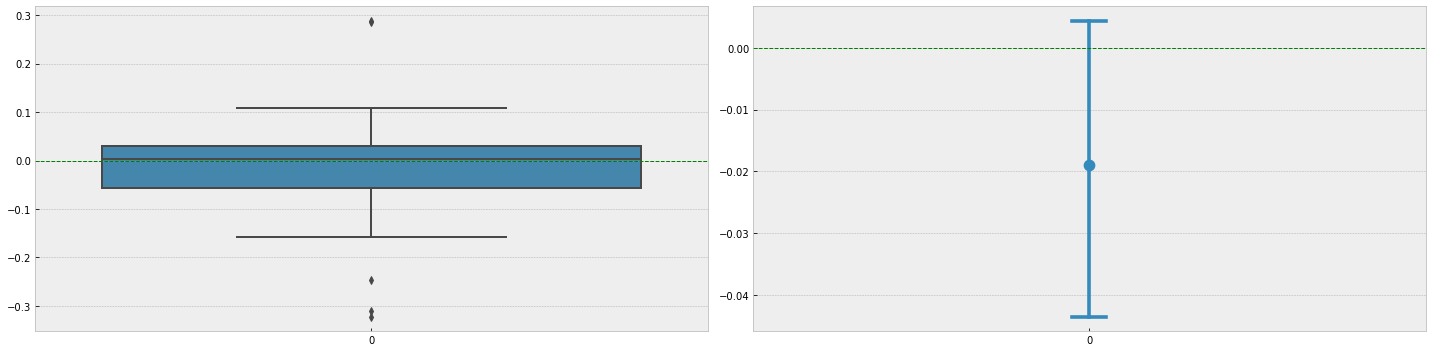

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data=diff_signals)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# plt.figure(figsize=(5,5))

plt.subplot(1,2,2)
sns.pointplot(data=diff_signals, capsize=0.05, ci=95, join=0)
plt.axhline(y=0, linewidth=1, linestyle='dashed', color='green')
# props = dict(boxstyle='round', facecolor='white', lw=0.5)
# plt.text(0.85,5400,'Mean:4504.3''\n''n:731' '\n' 't:1.601' '\n' 'Pval.:0.110', bbox=props)
# plt.figure(figsize=(5,5))
plt.tight_layout()

In [ ]:
getFundamentals('NVDA')

# 

# Stock analysis Loop

## MACD

In [9]:
# FIXME: trying with Spain and USA, some stocks cannot been found. They should be replaced from the array or, maybe, dropped.

stock_country = 'spain'
stock_list = investpy.stocks.get_stocks_list(country=stock_country)
macd_list = []

for stock_name in stock_list:
    stock = investpy.get_stock_historical_data(stock=stock_name, country=stock_country, from_date='31/12/2019', to_date=date.today().strftime("%d/%m/%Y"))
    stock = StockDataFrame(stock)
    stock.columns = stock.columns.str.lower()
    
    # MACD signals
    buy_signals = stock['macds_xd_macd']
    sell_signals = stock['macd_xd_macds']
    
    # Inversed MACD signals
    # buy_signals = stock['macd_xd_macds']
    # sell_signals = stock['macds_xd_macd']
    
    # Detect where buy signals are
    for i in range(len(buy_signals)):
        if buy_signals.iloc[i] == True:
            # if buy_signals.iloc[i] == True and stock.rsi_14[i] < (stock.dropna().iloc[1:,:].rsi_14.mean() - stock['rsi_14'].std()):
            buy_signals.iloc[i] = stock.close[i]
        else:
            buy_signals.iloc[i] = np.nan

    # Detect where sell signals are
    for i in range(len(sell_signals)):
        # if sell_signals.iloc[i] == True and stock.rsi_14[i] > (stock.dropna().iloc[1:,:].rsi_14.mean() + stock['rsi_14'].std()):
        if sell_signals.iloc[i] == True:
            sell_signals.iloc[i] = stock.close[i]
        else:
            sell_signals.iloc[i] = np.nan
    
    
    buy_signals.dropna()
    buy_signals.index[0]==buy_signals.index[1]
    # Join buy and sell signals
    pd.concat([buy_signals.dropna(), sell_signals.dropna()])

    buy_signals = pd.Series(buy_signals.dropna(), name="Price").to_frame()
    buy_signals['Type'] = 1
    sell_signals = pd.Series(sell_signals.dropna(), name="Price").to_frame()
    sell_signals['Type'] = 0

    bs_signals = pd.concat([buy_signals, sell_signals]).sort_values(by='Date')
    # Create a new list that have the differences between buy and sell signals. Then, mean and std could be really interesting!

    bs_signals.reset_index(level=0, inplace=True)
    # bs_signals

    ## Cálculo de la rentabilidad por operación

    # Si hay más señales de compra que de venta (a fecha de hoy)
    if bs_signals.loc[bs_signals['Type']==1].shape[0]>bs_signals.loc[bs_signals['Type']==0].shape[0]:
        diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
        diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price)
        # Cálculo en %
        # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==1].Price))*100
    
    # Si hay más señales de venta que de compra (a fecha de hoy)
    elif bs_signals.loc[bs_signals['Type']==1].shape[0]<bs_signals.loc[bs_signals['Type']==0].shape[0]:
        diff_signals = np.array(bs_signals.head(bs_signals.shape[0]-1).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
        diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
        # Cálculo en %
        # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price))*100
    
    # Si hay la misma cantidad de señales de compra que de venta
    else:
        diff_signals = np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==0].Price) - np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
        diff_signals = diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price)
        # Cálculo en %
        # diff_signals = (diff_signals / np.array(bs_signals.head(bs_signals.shape[0]).loc[bs_signals['Type']==1].Price))*100  

    # Print statistical analysis results
    print(stock_name)
    print(diff_signals.mean())
    print(diff_signals.std())
    result = stats.ttest_ind(diff_signals, np.zeros(diff_signals.shape), equal_var=False)
    print(result)
    print("\n")

    if result[1] < 0.05:
        macd_list.append(True)
    else:
        macd_list.append(False)
    
    time.sleep(10)

ACS
-0.016368198453993156
0.07469959657312711
Ttest_indResult(statistic=-1.0508640705797152, pvalue=0.30423764251783625)


ABG
0.10454368570497603
0.12435516648182918
Ttest_indResult(statistic=1.6813726146271855, pvalue=0.16798414789567112)


A3M
-0.025197990538318484
0.0648163341607893
Ttest_indResult(statistic=-1.7815215947908425, pvalue=0.08929649586471892)


ACX
0.007830714575444672
0.12903553304788928
Ttest_indResult(statistic=0.2427459906733888, pvalue=0.8112866007772483)


BBVA
0.02783483191765997
0.1595142098744256
Ttest_indResult(statistic=0.6291597081040681, pvalue=0.5401435675699129)


BKT
0.05158610821879567
0.20939694918627125
Ttest_indResult(statistic=1.0157501044173896, pvalue=0.3239876783021066)


BME
-0.05247648513438493
0.1520550047392237
Ttest_indResult(statistic=-1.543401852270278, pvalue=0.13840905546647203)


ANA
0.00022561706647052147
0.0869807248659926
Ttest_indResult(statistic=0.012707336963857485, pvalue=0.989966329420093)


CABK
0.02443781952099289
0.13931813

MDF
-0.044942792124537584
0.140507052349244
Ttest_indResult(statistic=-1.3942438179151586, pvalue=0.17933549400065885)


ZOT
0.0010715607243049156
0.06833691611854702
Ttest_indResult(statistic=0.0607305256866358, pvalue=0.9523755984143781)


BDL
0.006790384301654971
0.043426663017578686
Ttest_indResult(statistic=0.38301300493033275, pvalue=0.7149122682858151)


MTBA
0.0008656599941352583
0.11721804946164342
Ttest_indResult(statistic=0.03133207154698031, pvalue=0.9753495191288793)


MVC
0.05127701551206648
0.1951935358686215
Ttest_indResult(statistic=1.017426249479495, pvalue=0.3250813450124208)


NHH
0.031030302491920993
0.12096047332329356
Ttest_indResult(statistic=1.0883755682236635, pvalue=0.29078783571025574)


FAE
0.012012106212638317
0.09905929667720369
Ttest_indResult(statistic=0.5556912659559807, pvalue=0.5842942379397158)


TUR
0.015486175335718172
0.15960051455976723
Ttest_indResult(statistic=0.4116670785705823, pvalue=0.6854439607519393)


PVA
-0.026321263025234007
0.0989011

C:\Users\amaia\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\amaia\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


TUBA
0.05539469504780661
0.21398340340798136
Ttest_indResult(statistic=1.0673639877833028, pvalue=0.30073134832064397)


REN
0.013436114735812972
0.07710519214320682
Ttest_indResult(statistic=0.6970277545438542, pvalue=0.4957891313161269)


FLUI
-0.029958304402328488
0.10731460082109023
Ttest_indResult(statistic=-1.3958167934796468, pvalue=0.17504372824038802)


ENOR
0.0018734078956013822
0.05812969359255827
Ttest_indResult(statistic=0.15116305239274966, pvalue=0.8812246290582082)


AZK
-0.01007010014640398
0.04769349726246193
Ttest_indResult(statistic=-0.9903437395200004, pvalue=0.3327741701615464)


APAM
0.0025641062615376514
0.15300910123887737
Ttest_indResult(statistic=0.07494346226346227, pvalue=0.9410042498138244)


SNCE
-0.09852941176470595
0.0
Ttest_indResult(statistic=nan, pvalue=nan)


ECR
0.006035133359713337
0.07342036362478511
Ttest_indResult(statistic=0.3389181294981594, pvalue=0.7388217469060181)


CDRE
0.047814631957742805
0.23368455649351375
Ttest_indResult(statistic=0

IndexError: ERR#0007: stock information unavailable or not found.